In [12]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection, naive_bayes, svm
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [13]:
df = pd.read_csv("dataset.csv")
#DataFlair - Get the labels
labels=df.label
labels.head()

0    False
1     True
2     True
3     True
4     True
Name: label, dtype: bool

In [14]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['finaltext'], labels, test_size=0.2, random_state=7)

In [15]:
#DataFlair - Initialize a TfidfVectorizer
vectorizer = CountVectorizer()

#DataFlair - Fit and transform train set, transform test set
vec_train=vectorizer.fit_transform(x_train).toarray()
vec_test=vectorizer.transform(x_test).toarray()

In [16]:
terms = vectorizer.get_feature_names()
# sum tfidf frequency of each term through documents
sums = vec_train.sum(axis=0)
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

C:\Users\Monique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rank
1527,covid19,1460
1514,corona,1146
6320,vaksin,952
5083,ri,829
4303,omicron,566
...,...,...
1823,dprputri,1
4170,ngedrop,1
1822,dprormas,1
4173,ngemplak,1


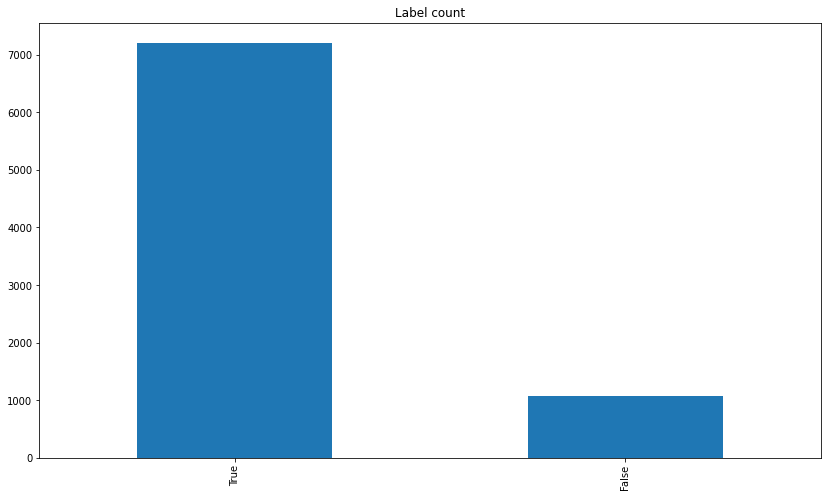

In [17]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(vec_train, y_train)
y_oversample

0         True
1         True
2         True
3         True
4         True
         ...  
11543    False
11544    False
11545    False
11546    False
11547    False
Name: label, Length: 11548, dtype: bool

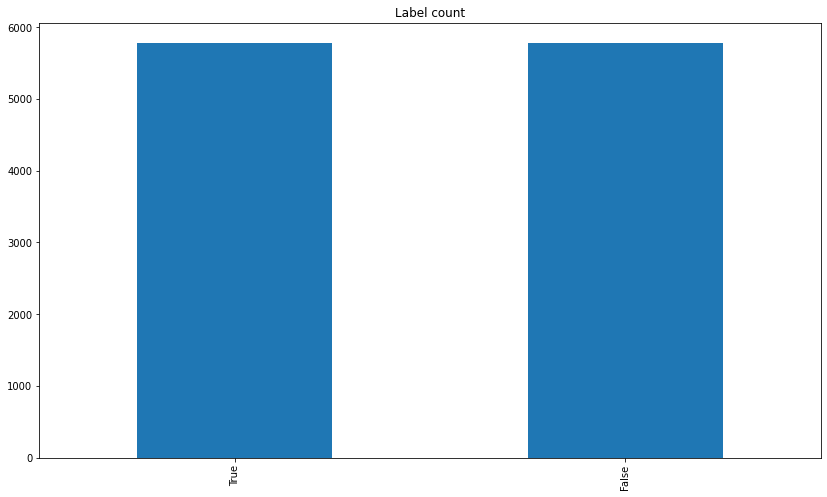

In [19]:
oversample_df = pd.DataFrame(y_oversample)
ax = oversample_df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [9]:
SVM = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.1)
SVM.fit(X_oversample,y_oversample)# predict the labels on validation dataset
y_pred = SVM.predict(vec_test)# Use accuracy_score function to get the accuracy
score=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {round(score*100,2)}%')
#DataFlair - Build confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

       False       0.75      0.62      0.68       229
        True       0.94      0.97      0.95      1426

    accuracy                           0.92      1655
   macro avg       0.84      0.80      0.82      1655
weighted avg       0.91      0.92      0.92      1655

Accuracy: 91.9%


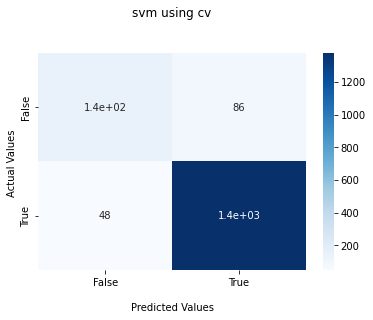

In [10]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('svm using cv\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [11]:
# # Classifier - Algorithm - SVM
# # fit the training dataset on the classifier
# gamma = [0.1, 0.5, 1, 3]
# c = [0.08, 1.0, 10.0]
# labels = [[]]
# for k in range(10):
#     times = []
#     for i in gamma:
#         for j in c:
#             if k == 0:
#                 label = "g: " + str(i) + " c: " + str(j)
#                 labels[0].append(label)
#             SVM = svm.SVC(C=j, kernel='rbf', degree=3, gamma=i)
#             SVM.fit(X_oversample,y_oversample)# predict the labels on validation dataset
#             y_pred = SVM.predict(vec_test)# Use accuracy_score function to get the accuracy
#             score=accuracy_score(y_test,y_pred)
#             print(classification_report(y_test, y_pred))
#             print(f'Accuracy: {round(score*100,2)}%')
#             times.append(round(score*100,2))
#             #DataFlair - Build confusion matrix
#             confusion_matrix(y_test,y_pred)
#     labels.append(times)

# with open('svm_cv.csv', 'w') as f:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f)
      
#     write.writerows(labels)